# Linear regression to prove Moore's Law

In this notebook, we have a simple implementation of linear regression using TensorFlow. The idea of this linear regression is to prove **_Moore's Law_**.

## **_Moore's Law_**

Is the observation that the number of transistors in an integrated circuit doubles about every two years. It's an observation and projection of a historical trend.

**_Source: [Wikipedia Moore's law](https://en.wikipedia.org/wiki/Moore%27s_law)_**


## Downloading Data

In the cell bellow, we use the `wget` shell command to download the data from the provided url and save it in the folder `datasets`, as specified by the `-P` flag.


In [49]:
!wget "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"  -P ../datasets

--2025-01-10 16:00:57--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2,2K) [text/plain]
Saving to: ‘../datasets/moore.csv.2’

moore.csv.2         100%[===================>]   2,25K  --.-KB/s    in 0s      

2025-01-10 16:00:57 (4,52 MB/s) - ‘../datasets/moore.csv.2’ saved [2302/2302]



## Importing packages

This is a somewhat simple problem, and designed basically to show the versatility of TensorFlow in how it can be used to solve a plethora logistic and linear regression problems. Bellow, you can find all of the used packages listed and how they were used in this notebook.

- `numpy`: The numpy package is used 3 times (at least explicitly) in the notebook, the first usage of it is from the `.log` function used to linearize the data from the dataset, the second is of the `.allclose` function that returns whether 2 arrays are equal element-wise bar a small tolerance (since the arrays contain float numbers). Finally, the last time it is used is to transform the dataset from a `DataFrame` object into a numpy array.
- `pandas`: The pandas package is used is only used to read the data's csv and turn in into a `DataFrame` object. This is done using the `.read_csv` function.
- `matplotlib`: The matplotlib package is used in a couple of instances throughout the notebook, as you would expect, its used to visualize the data in scatter plots before and after it was linearized. Then used again to plot the model's loss through the training process, finally to plot the line that best fits the dataset.
- `keras`:
  - `optimizer`
    - `SGD`: Stands for **_Stochastic Gradient Descent_**, and its the optimizer the model will use in the training process. In **_Kera's_** documentation it simply states "_Gradient descent with momentum_".
  - `models`
    - `Sequential`: Class from Keras that is used to create Sequential models. Sequential models should be used for plain stacks of layers where each layer has exactly one input layer and one output tensor. Our model uses only two layers therefore its ok to use it.
  - `layers`
    - `Input`: This is where the dimensionality of the data that goes into the model is defined, as well as the initialization of the model's weights.
    - `Dense`: Is a "_simple densely-connected NN layer_", and it implements the operation:
      - $$output = activation(dot(input, kernel) + bias)$$
  - `callbacks`
    - `LearningRateScheduler`: the learning rate scheduler class is exactly what it sounds like, it is a class that schedules a variation in the learning rate's value at a specified rate. "At the beginning of every epoch, this callback gets the updated learning rate value fom `schedule` function provided at `__init__`, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer".

**_Source: [Keras documentation](https://keras.io)_**


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import LearningRateScheduler

## Exploratory Data analysis

In this step, we'll go through the processes of importing, linearizing the data and plotting it.


### Reading dataset

Using panda's `read_csv`, we'll read the file containing the data and transform it into a `DataFrame` object. Then we turn the `DataFrame` into a numpy array.


In [51]:
data = pd.read_csv('../datasets/moore.csv', header=None).to_numpy()
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

### Splitting the data

In the cell bellow, we split the data into features (X), and labels (Y). In some of the cells bellow, you may find the notation $N\times D$, where $N$ is the number of samples, and $D$ the number of features of X.


In [52]:
X = data[:, 0].reshape(-1, 1)  # Making an N x D matrix
Y = data[:, 1]

### Plotting the data

In the cells bellow, we first show the data as it is, then do a linearization, plot the linearized data, and normalize the data..

#### Linearizing the data

Linearizing data using a logarithmic function involves transforming exponential growth into a linear relationship. Moore's law observes that the number of transistors on a microchip doubles approximately every two years, leading to an exponential increase.

This exponential growth can be expressed by the following function:

$$ N = N_0 \cdot r^T$$

Where $N$ is the number of transistors, $N_0$ is the initial number of transistors, $r$ is the rate of growth, and $T$ is the period of analysis. To linearize this function, we apply a log on both sides of the function:

$$\log {N} = \log {N_0} + \log {r} * T$$

This is our linear equation, to help visualize, a simple linear equation is as follows:

$$\hat {y} = a * x + b$$

The equivalence between the equations is shown bellow:

$$\hat {y} = \log {N}, a = \log {r}, x = T, b = \log {N_0}$$

Once this process is done, we have a linearization of our previously exponential function.

#### Normalization

The process we use to normalize the data is very basic, we simply take the mean of the feature's values, and remove that from all values. This makes the mean of the means 0.


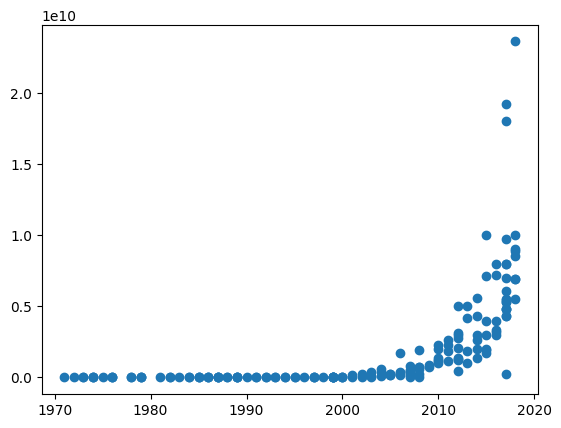

In [ ]:
# plot the data
plt.scatter(X, Y)

In [54]:
# Linearizing data
Y = np.log(Y)

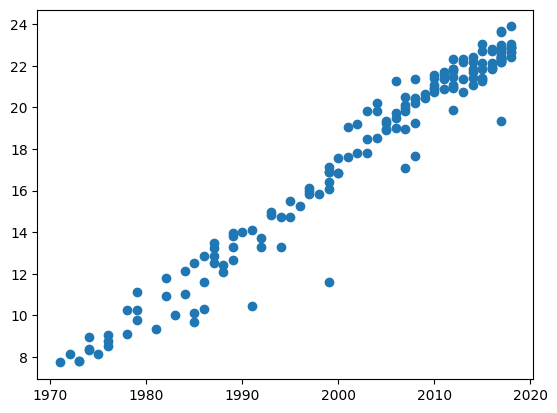

In [ ]:
# Data after linearization
plt.scatter(X, Y)

In [56]:
# Normalizing the data
X = X - X.mean()

## Creating and compiling model

In the following cells, we will create the model, compile it, and define a scheduler.


### Creating a model

For the purpose we designed this model, and the amount of data, we don't need anything complicated whatsoever. So for this model we'll use two simple layers, one is the input layer and the other one is a single neuron (remember that the neuron is represented by this function, $output = activation(x * weights + bias)$. In this case, the activation function is the default (linear activation $a(x) = x$).


In [57]:
model = Sequential(
    [
        Input(shape=(1,)),
        Dense(1),
    ]
)

### Compiling the model

To compile the model, we use "Stochastic Gradient Descent" as the optimizer. "Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties. It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data)".

**_Source: [Stochastic Gradient Descent Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)_**


In [58]:
model.compile(
    optimizer=SGD(0.001, 0.9),
    loss='mse',
)

In [59]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001


scheduler = LearningRateScheduler(schedule)

In [60]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 507us/step - loss: 618.8264 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 466us/step - loss: 391.7005 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 408us/step - loss: 406.7457 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 536us/step - loss: 291.1634 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 369us/step - loss: 345.5285 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 381us/step - loss: 203.3630 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 437us/step - loss: 129.3388 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 348us/step - loss: 81.4555 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 373us/step - loss: 59.2711 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 376us/step - loss: 38.8138 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 

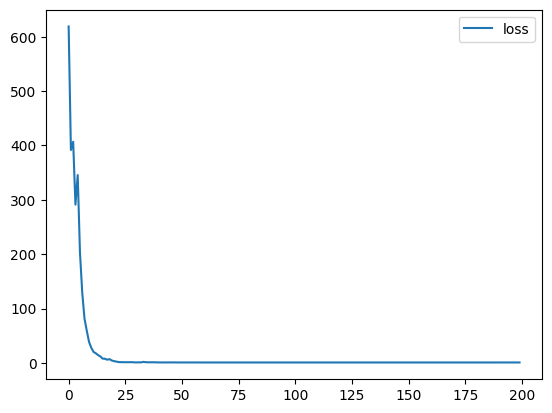

In [61]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [62]:
model.layers

In [63]:
model.layers[0].get_weights()

[array([[0.34660515]], dtype=float32), array([17.762384], dtype=float32)]

In [64]:
a = model.layers[0].get_weights()[0][0, 0]

In [65]:
a

0.34660515

## Part 2: Making predictions


6/6 [==============================] - 0s 711us/step


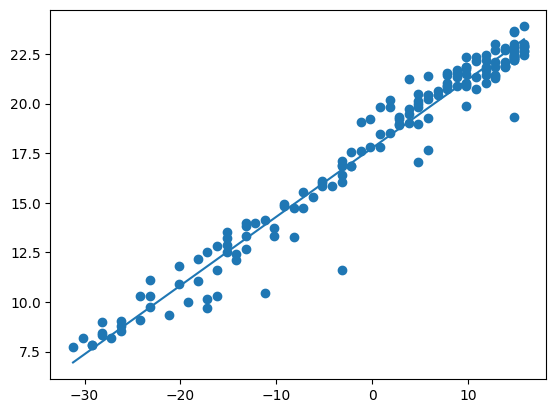

In [66]:
# Make sure that the line fits our data
Y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Y_hat)

In [67]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we fattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Y_hat_manual = (X.dot(w) + b).flatten()

# Dont use == for floating points
np.allclose(Y_hat, Y_hat_manual)

True